## Import the required libraries

In [287]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [288]:
data_path = "https://raw.githubusercontent.com/IsaTran21/Links/main/realestate.csv"

## The dataset
Information about the dataset: [dataset link](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

ISO-8859-1 (also known as Latin-1) is designed to cover a wide range of characters used in Western European languages. The default one is typically  UTF-8.

In [289]:
df = pd.read_csv(data_path, encoding="ISO-8859-1")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [290]:
# To get some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Some questions
<br> 1. The average house price
<br> 2. The price of the cheapest house
<br> 3. The average number of bathrooms and bedrooms
<br> 4. The maximum number of bedrooms

In [291]:
# 1. The average house price
df["price"].mean()

540088.1417665294

In [292]:
# 2. The price of the cheapest house
df["price"].min()

75000.0

In [293]:
# 3.The average number of bedrooms
np.floor(df["bedrooms"].mean())

3.0

In [294]:
# 3.The average number of bathrooms
np.floor(df["bathrooms"].mean())

2.0

In [295]:
# 4. The maximum number of bedrooms
df["bedrooms"].max()

33

## Data visualization

<Axes: xlabel='sqft_living', ylabel='price'>

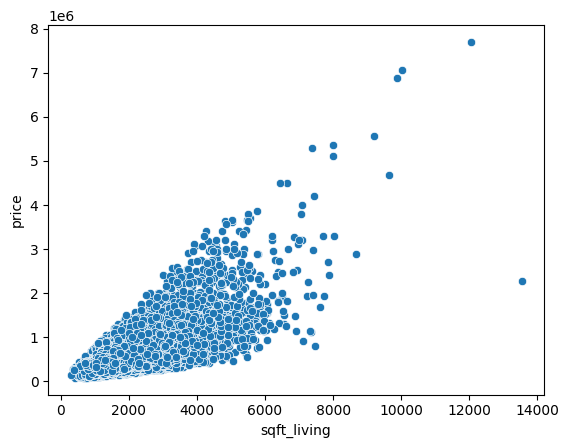

In [296]:
#Plot the scatter plot

sns.scatterplot(x = "sqft_living", y = "price", data=df)

### Comment:
We can see that as the sqft_living increases, the price of the house increases too.

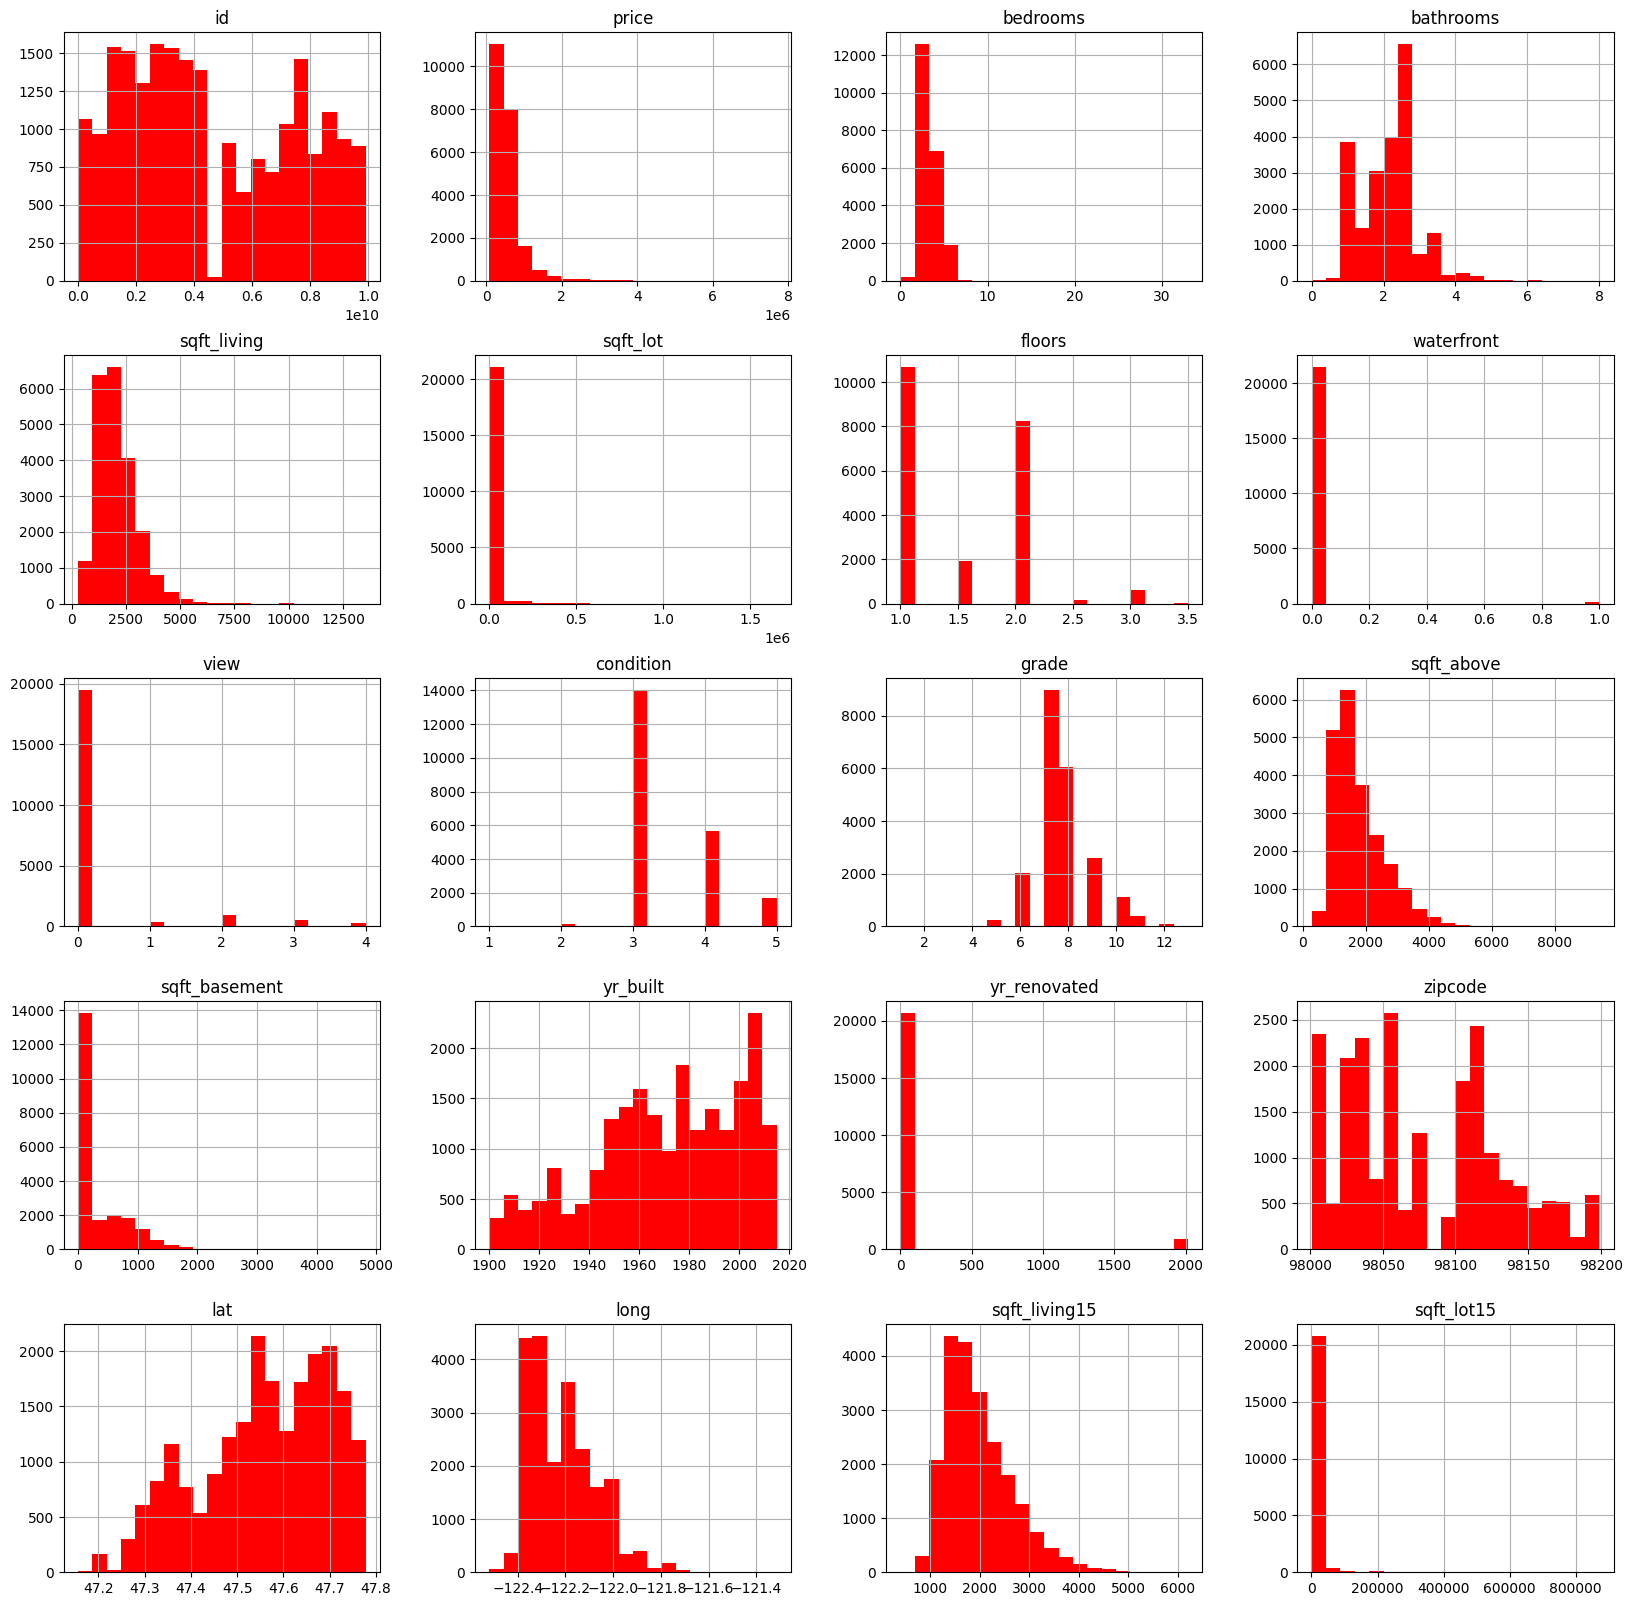

In [297]:
# The histogram

df.hist(bins=20, figsize=(20, 20), color="r")
plt.show()

<ipython-input-298-a196d7f09249>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


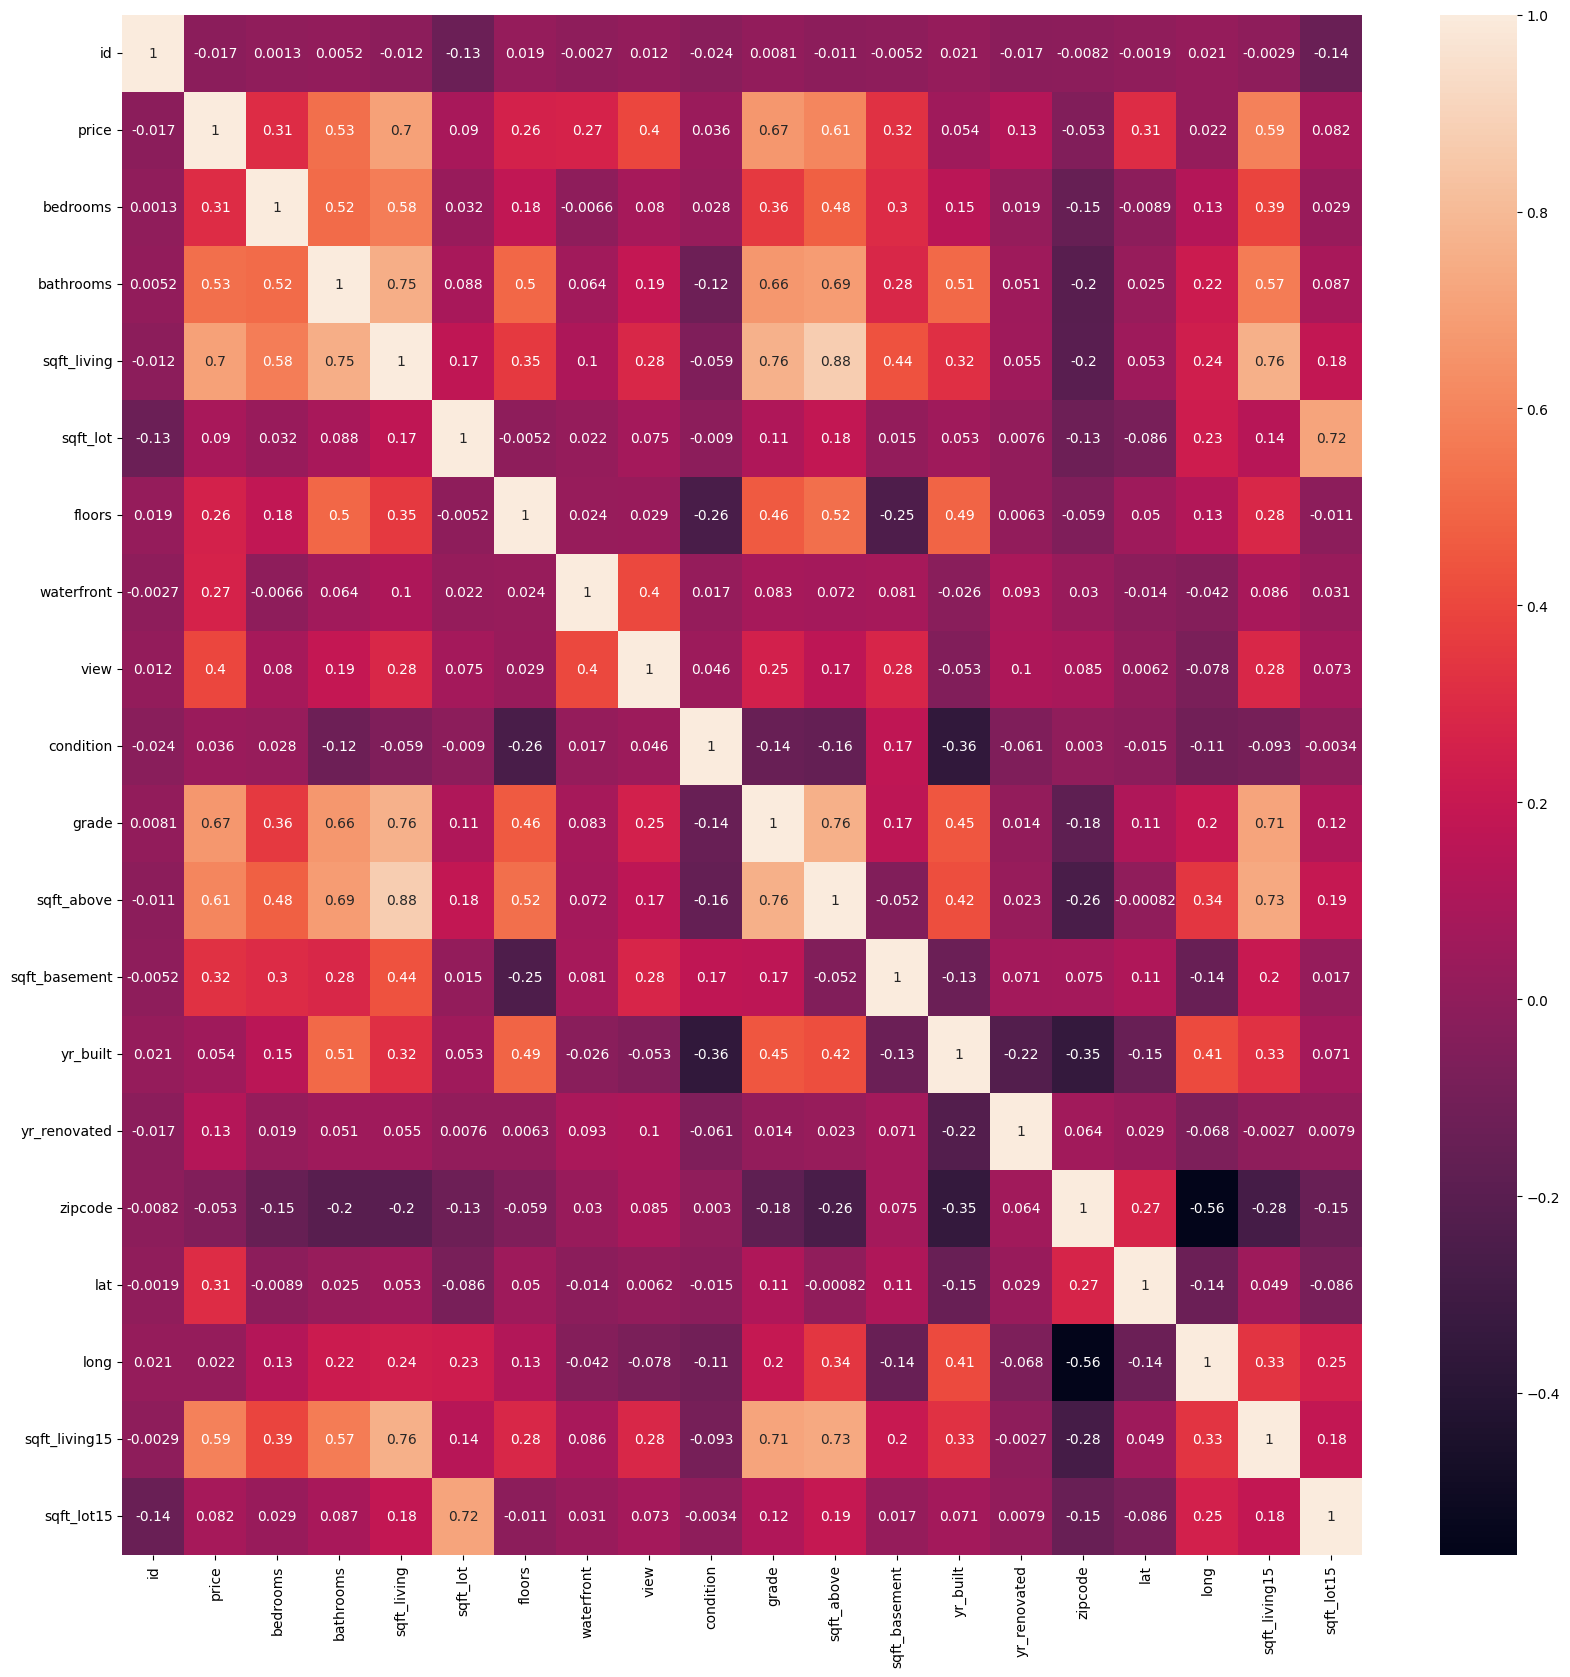

In [298]:
# The correlation matrix

# Create a figure and axis for the heatmap, specifying the size of the figure.
f, ax = plt.subplots(figsize=(20, 20))

# Generate a heatmap of the correlation matrix of the DataFrame 'df'.
# The 'annot=True' parameter adds numeric values to the heatmap cells.
sns.heatmap(df.corr(), annot=True)

# Display the heatmap.
plt.show()

### The pairplot

Many scatter plots, to see all the combination of numeric features.

In [299]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [300]:
df_1 = df[['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_basement', 'yr_built']]
df_1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_basement,yr_built
0,221900.0,3,1.00,1180,0,1955
1,538000.0,3,2.25,2570,400,1951
2,180000.0,2,1.00,770,0,1933
3,604000.0,4,3.00,1960,910,1965
4,510000.0,3,2.00,1680,0,1987


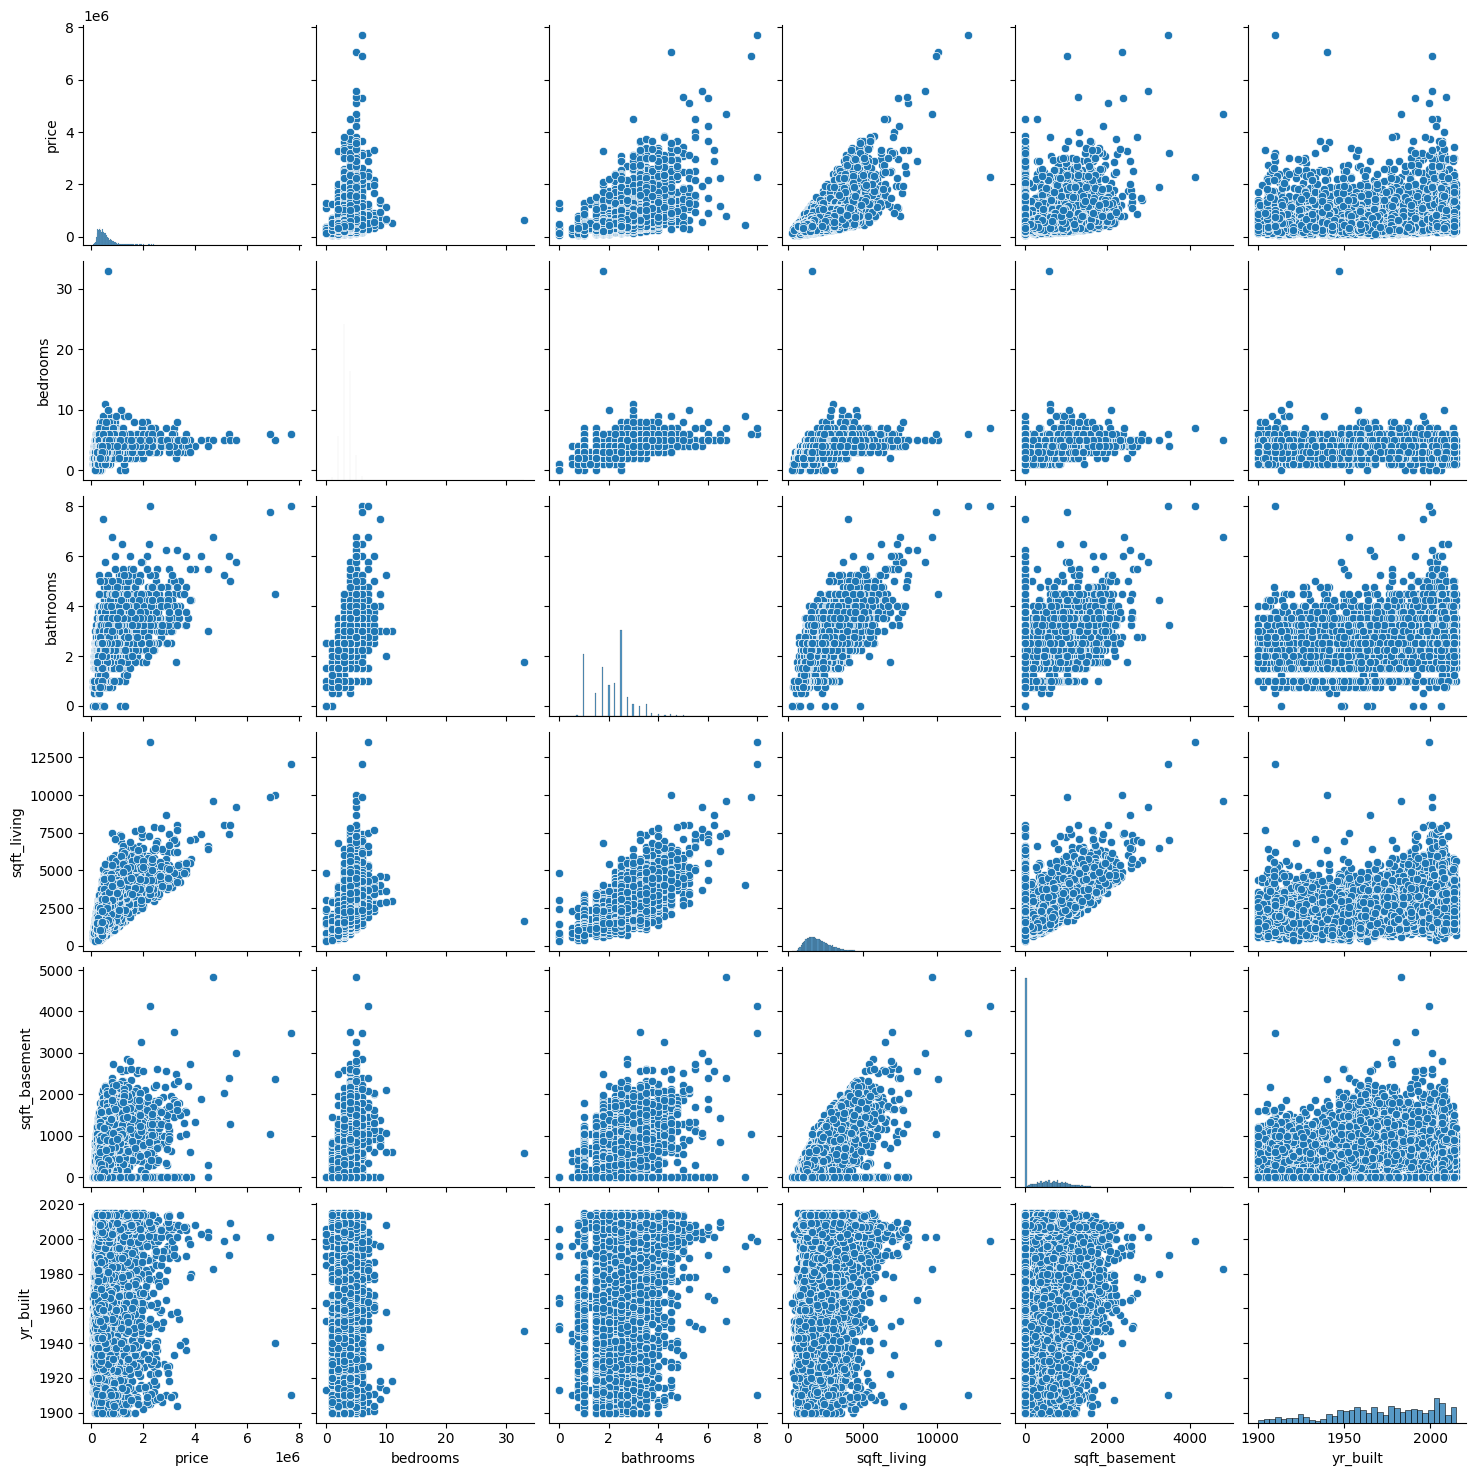

In [301]:
# The pairplot
sns.pairplot(df_1)

## Data cleaning and feature engineering

Clean the data and prepare the data for model training.

In [302]:
# The X
X = df[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'sqft_above', 'sqft_basement']]
X.shape

(21613, 7)

In [303]:
# The y

y = df[['price']]
y.shape

(21613, 1)

## Peform MinMaxScaler

Some reasons that we use the MinMaxSclaler

<ol>
<li>Standardizes feature scales for equal importance.</li>
<li>Helps algorithms sensitive to scale perform better.</li>
<li>Improves convergence speed in optimization.</li>
<li>Maintains relative relationships for interpretability.</li>
<li>Facilitates comparisons and visualizations.</li>
<li>Protects data privacy when needed.</li>
<li>Ensures consistent regularization effects.</li>
</ol>

In [304]:
#Import the MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(21613, 7)

In [305]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

### Check the X_scaled min and max
To check the max and min in the data.

In [306]:
# Check the X_scaled min and max
print(scaler.data_max_)
print(scaler.data_min_)

[3.300000e+01 8.000000e+00 1.354000e+04 1.651359e+06 3.500000e+00
 9.410000e+03 4.820000e+03]
[  0.   0. 290. 520.   1. 290.   0.]


In [307]:
# Scale the y
y = y["price"].values.reshape(-1,1)

In [308]:
#Create an array y
y.shape

(21613, 1)

In [309]:
y_scaled = scaler.fit_transform(y)

In [310]:
# Check the X_scaled min and max
print(scaler.data_max_)
print(scaler.data_min_)

[7700000.]
[75000.]


In [311]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

### Split the data

In [312]:
#Import the train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=2001)

In [313]:
#Check the shape
print(f'The shape of X_train is {X_train.shape}')
print(f'The shape of y_train is {y_train.shape}')
print(f'The shape of X_test is {X_test.shape}')
print(f'The shape of y_test is {y_test.shape}')

The shape of X_train is (16209, 7)
The shape of y_train is (16209, 1)
The shape of X_test is (5404, 7)
The shape of y_test is (5404, 1)


## Training

In [314]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [315]:
he_initializer = tensorflow.keras.initializers.HeNormal()

In [316]:
#The model
model = Sequential()
model.add(Dense(100, input_shape=(X.shape[1],), kernel_initializer=he_initializer, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 100)               800       
                                                                 
 dense_76 (Dense)            (None, 100)               10100     
                                                                 
 dense_77 (Dense)            (None, 100)               10100     
                                                                 
 dense_78 (Dense)            (None, 1)                 101       
                                                                 
Total params: 21101 (82.43 KB)
Trainable params: 21101 (82.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [317]:
# Compile the model
model.compile(optimizer='Adam', loss="mean_squared_error")
history = model.fit(X_train, y_train, epochs=100, batch_size=1024, validation_split=0.2, )

Epoch 1/100
13/13 [==============================] - 1s 14ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 11

In [318]:
#Model 2
model2 = Sequential()
#The model
model2.add(Dense(250, input_shape=(X.shape[1],), kernel_initializer=he_initializer, activation="relu"))
model2.add(Dense(150, activation="relu"))
model2.add(Dense(100, activation="relu"))
model2.add(Dense(1, activation='linear'))
model2.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 250)               2000      
                                                                 
 dense_80 (Dense)            (None, 150)               37650     
                                                                 
 dense_81 (Dense)            (None, 100)               15100     
                                                                 
 dense_82 (Dense)            (None, 1)                 101       
                                                                 
Total params: 54851 (214.26 KB)
Trainable params: 54851 (214.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [319]:
# Compile the model
model2.compile(optimizer='Adam', loss="mean_squared_error")
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=1024, validation_split=0.2, )

Epoch 1/100
13/13 [==============================] - 1s 14ms/step - loss: 0.0082 - val_loss: 0.0027
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 11

## Evaluate the models

In [320]:
history.history.keys()


dict_keys(['loss', 'val_loss'])

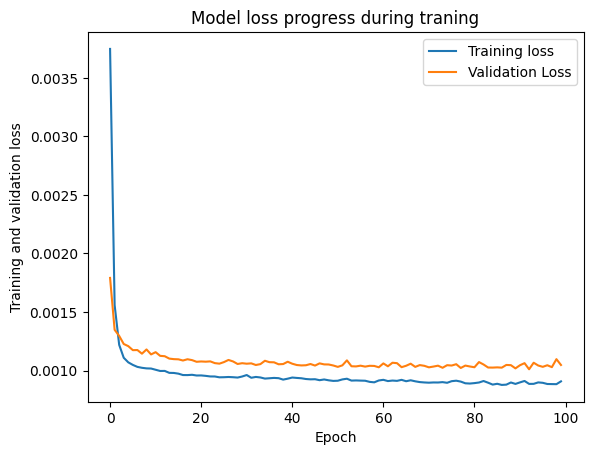

In [321]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss progress during traning")
plt.xlabel("Epoch")
plt.ylabel("Training and validation loss")
plt.legend(["Training loss", "Validation Loss"])

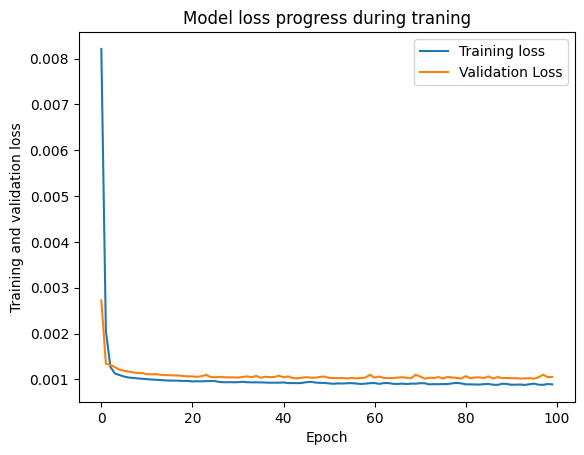

In [322]:
plt.plot(history2.history["loss"])
plt.plot(history2.history["val_loss"])
plt.title("Model loss progress during traning")
plt.xlabel("Epoch")
plt.ylabel("Training and validation loss")
plt.legend(["Training loss", "Validation Loss"])

## Testing as an agent

In [323]:
X_test_1 = np.array([[5, 2, 1970, 4500, 1, 1950, 3500]])
# Create a NumPy array representing a single test data point with six features

# Scale the data before fitting into the model
scaler_1 = MinMaxScaler()
# Create a MinMaxScaler instance to scale the data

X_test_scaled_1 = scaler_1.fit_transform(X_test_1)
# Fit the scaler to the test data and scale it to the same range as the training data
# X_test_scaled_1 now contains the scaled test data
y_pred_1 = model.predict(X_test_scaled_1)
# Use the machine learning model (assumed to be previously trained) to make predictions on the scaled test data
# y_pred_1 now contains the model's predictions

y_pred_1 = scaler.inverse_transform(y_pred_1)
# Inverse transform the scaled predictions to get them back to their original scale

y_pred_1
# Display or use the final predictions (y_pred_1) in their original scale


1/1 [==============================] - 0s 53ms/step


array([[154133.14]], dtype=float32)

## Evaluate the test set

169/169 [==============================] - 0s 1ms/step


Text(0, 0.5, 'True Values')

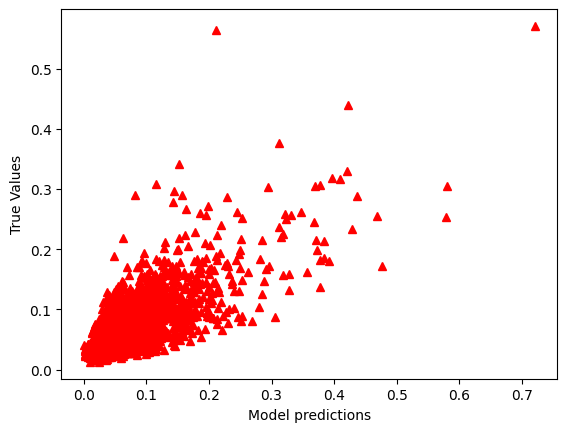

In [324]:
y_preds = model.predict(X_test)
plt.plot(y_test, y_preds, "^", color="r")
plt.xlabel("Model predictions")
plt.ylabel("True Values")

## Back to the original

In [325]:
y_pred_original = scaler.inverse_transform(y_preds)
y_test_origin = scaler.inverse_transform(y_test)

(0.0, 3000000.0)

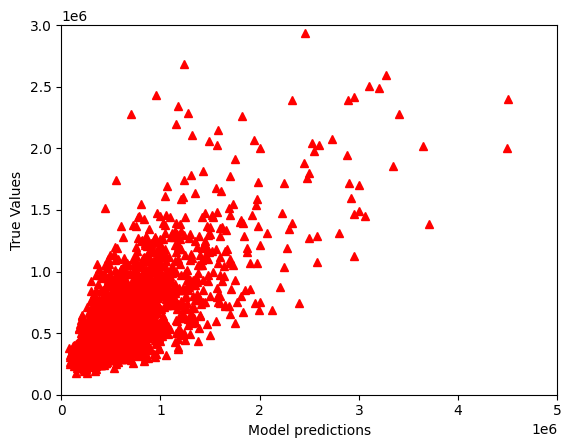

In [326]:
plt.plot(y_test_origin, y_pred_original, "^", color="r")
plt.xlabel("Model predictions")
plt.ylabel("True Values")
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

## Common related metrics
R2, MSE, MAE

In [327]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [328]:
k = X_test.shape[1]
n = len(X_test)

RMSE = np.sqrt(mean_squared_error(y_test_origin, y_pred_original))
MSE = mean_squared_error(y_test_origin, y_pred_original)
MAE = mean_absolute_error(y_test_origin, y_pred_original)
r2 = r2_score(y_test_origin, y_pred_original)
adj_r2 = 1 - (1-r2)*(n-1)/(n-k-1)
print(f"RMSE: {RMSE}, MSE: {MSE}, MAE: {MAE}, r2: {r2}, adj_r2: {adj_r2}")

RMSE: 233249.7972288449, MSE: 54405467907.29726, MAE: 151277.1278104182, r2: 0.5741024173859213, adj_r2: 0.573549918668668


### Comment: r2 is around 57.27%, only explain 57.27% variance.

## Use the entire features

In [329]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [330]:
y = df["price"]
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [331]:
X = df.drop(columns="price")
X

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [332]:
y = df[["price"]]
y = y["price"].values.reshape(-1,1)
X = df.drop(columns=["price", "id", "date"])
#Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=2001)


In [333]:
scaler.data_max_

array([7700000.])

In [334]:
#The model

#The model
model3 = Sequential()
model3.add(Dense(10, input_shape=(X.shape[1],), kernel_initializer=he_initializer, activation="relu"))
model3.add(Dense(10, activation="relu"))
model3.add(Dense(9, activation="relu"))
model3.add(Dense(1, activation='linear'))
model3.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 10)                190       
                                                                 
 dense_84 (Dense)            (None, 10)                110       
                                                                 
 dense_85 (Dense)            (None, 9)                 99        
                                                                 
 dense_86 (Dense)            (None, 1)                 10        
                                                                 
Total params: 409 (1.60 KB)
Trainable params: 409 (1.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [335]:
# Compile the model
model3.compile(optimizer='Adam', loss="mean_squared_error")
history3 = model3.fit(X_train, y_train, epochs=100, batch_size=1024, validation_split=0.2, )

Epoch 1/100
13/13 [==============================] - 1s 14ms/step - loss: 0.0145 - val_loss: 0.0046
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 0.0026
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 11

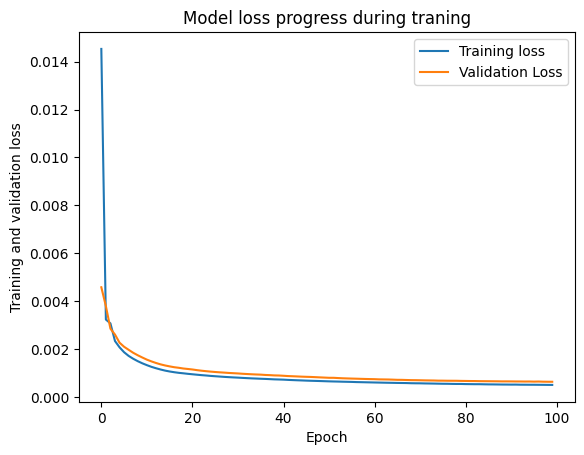

In [336]:
#Plot the val_losses

plt.plot(history3.history["loss"])
plt.plot(history3.history["val_loss"])
plt.title("Model loss progress during traning")
plt.xlabel("Epoch")
plt.ylabel("Training and validation loss")
plt.legend(["Training loss", "Validation Loss"])

## Test a value

In [337]:
X_test.shape

(5404, 18)

In [338]:
X_test[1,:]

array([0.09090909, 0.125     , 0.11622642, 0.00359393, 0.        ,
       0.        , 0.        , 0.75      , 0.5       , 0.16885965,
       0.        , 0.48695652, 0.        , 0.62626263, 0.89753901,
       0.19186047, 0.21872311, 0.00845558])

In [339]:
#Instead of entering a new observation by hand, I choose 1 element in the test data => then convert it to the original one, then use that new observation.
X_test_1 = X_test[1,:]
X_before = scaler.inverse_transform(X_test_1.reshape(-1,1))
#print(X_before)
X_test_1 = np.array(X_before.reshape(1,-1))

#Time for testing
# Create a MinMaxScaler instance to scale the data
scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)
# Fit the scaler to the test data and scale it to the same range as the training data
# X_test_scaled_1 now contains the scaled test data

y_pred_1 = model3.predict(X_test_scaled_1)
# Use the machine learning model (assumed to be previously trained) to make predictions on the scaled test data
# y_pred_1 now contains the model's predictions

y_pred_1 = scaler.inverse_transform(y_pred_1)
# Inverse transform the scaled predictions to get them back to their original scale

y_pred_1
# Display or use the final predictions (y_pred_1) in their original scale

1/1 [==============================] - 0s 56ms/step


array([[-513628.22]], dtype=float32)

## Plot the model predict and true values

The scatter plot looks better

169/169 [==============================] - 0s 1ms/step


Text(0, 0.5, 'True Values')

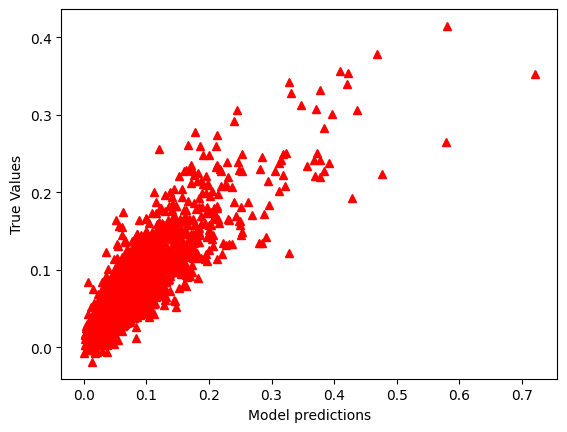

In [340]:
y_preds = model3.predict(X_test)
plt.plot(y_test, y_preds, "^", color="r")
plt.xlabel("Model predictions")
plt.ylabel("True Values")

## The not scaled plot

In [341]:
y_pred_original = scaler.inverse_transform(y_preds)
y_test_origin = scaler.inverse_transform(y_test)

(0.0, 3000000.0)

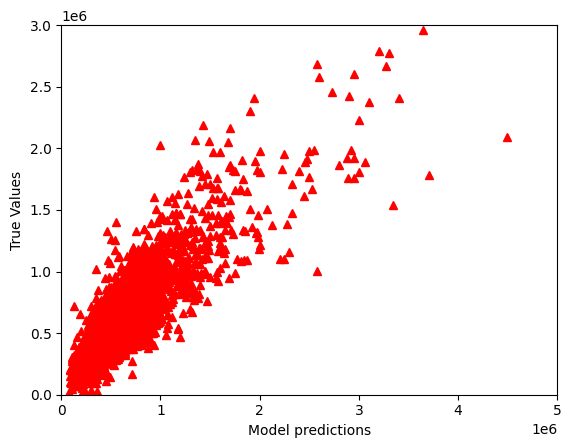

In [342]:
plt.plot(y_test_origin, y_pred_original, "^", color="r")
plt.xlabel("Model predictions")
plt.ylabel("True Values")
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

## Calculate related errors

In [343]:
k = X_test.shape[1]
n = len(X_test)

RMSE = np.sqrt(mean_squared_error(y_test_origin, y_pred_original))
MSE = mean_squared_error(y_test_origin, y_pred_original)
MAE = mean_absolute_error(y_test_origin, y_pred_original)
r2 = r2_score(y_test_origin, y_pred_original)
adj_r2 = 1 - (1-r2)*(n-1)/(n-k-1)
print(f"RMSE: {RMSE}, MSE: {MSE}, MAE: {MAE}, r2: {r2}, adj_r2: {adj_r2}")

RMSE: 172681.39663962598, MSE: 29818864745.41183, MAE: 106253.39498122051, r2: 0.7665715800292991, adj_r2: 0.7657913179012634


### Comment

The r2 now is much higher than the previous one, now is around 75.93%.